In [10]:
import pandas as pd
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [15]:
import pandas as pd

# 读取Excel文件
df = pd.read_excel('book_review_2.0.xlsx')

# 保存为CSV文件
df.to_csv('book_review_2.0.csv', index=False, sep=';', encoding='utf-8')

# 读取CSV文件
data = pd.read_csv('book_review_2.0.csv', sep=';')



In [17]:
# 加载Spacy模型（法语）
nlp = spacy.load('fr_core_news_sm')

In [18]:
def morphosyntax_analysis(text):
    doc = nlp(text)
    tokens_pos = [(token.text, token.pos_) for token in doc]
    return tokens_pos

In [19]:
# 对每条书评进行形态句法分析
data['tokens_pos'] = data['reader_review'].apply(morphosyntax_analysis)

In [20]:
# 统计所有书评中的词性标签分布
pos_counts = Counter([pos for tokens in data['tokens_pos'] for _, pos in tokens])

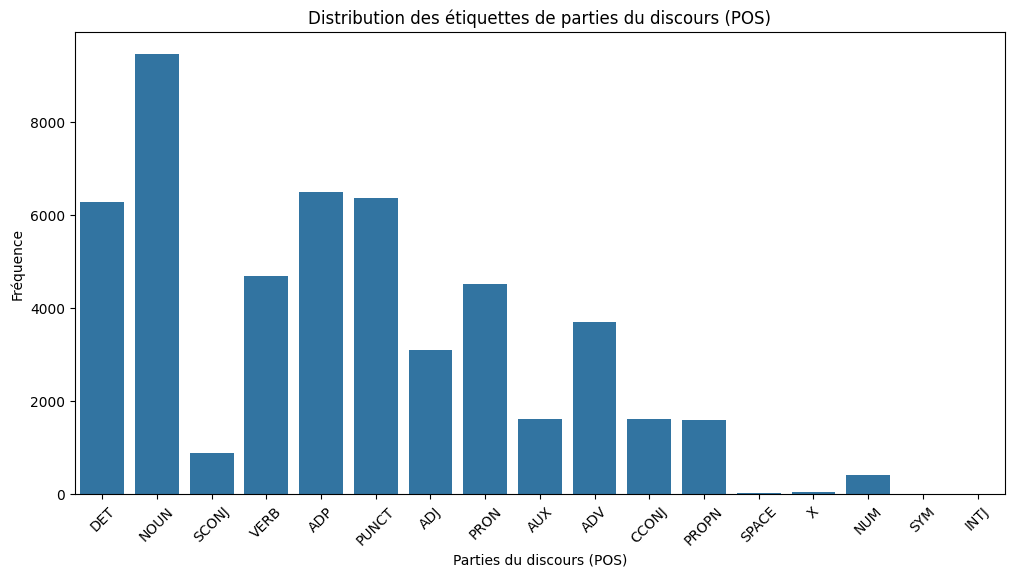

In [21]:
# 将词性标签分布转换为DataFrame
pos_df = pd.DataFrame(pos_counts.items(), columns=['POS', 'Count'])

# 绘制词性标签分布图
plt.figure(figsize=(12, 6))
sns.barplot(x='POS', y='Count', data=pos_df)
plt.title('Distribution des étiquettes de parties du discours (POS)')
plt.xlabel('Parties du discours (POS)')
plt.ylabel('Fréquence')
plt.xticks(rotation=45)
plt.show()

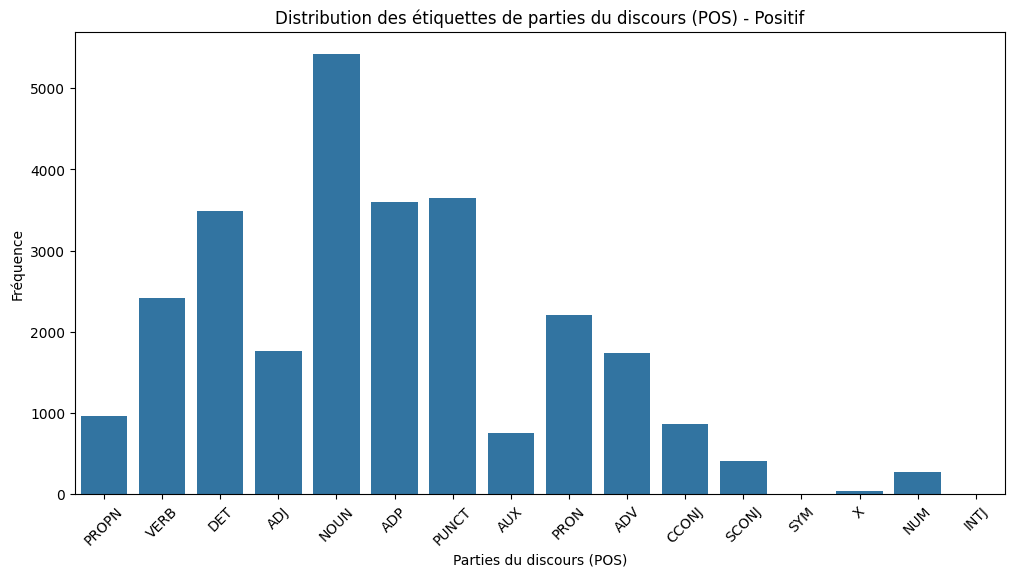

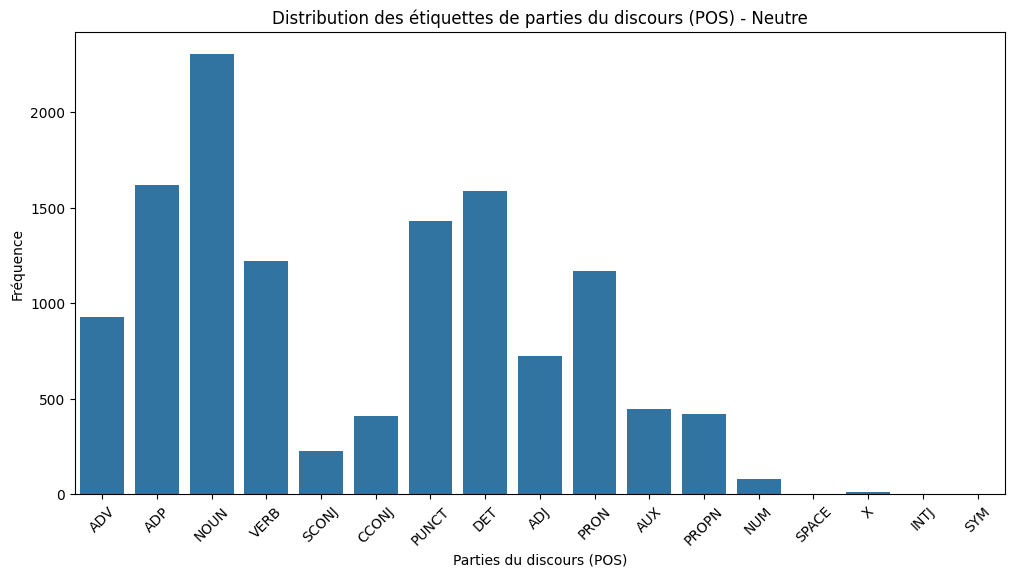

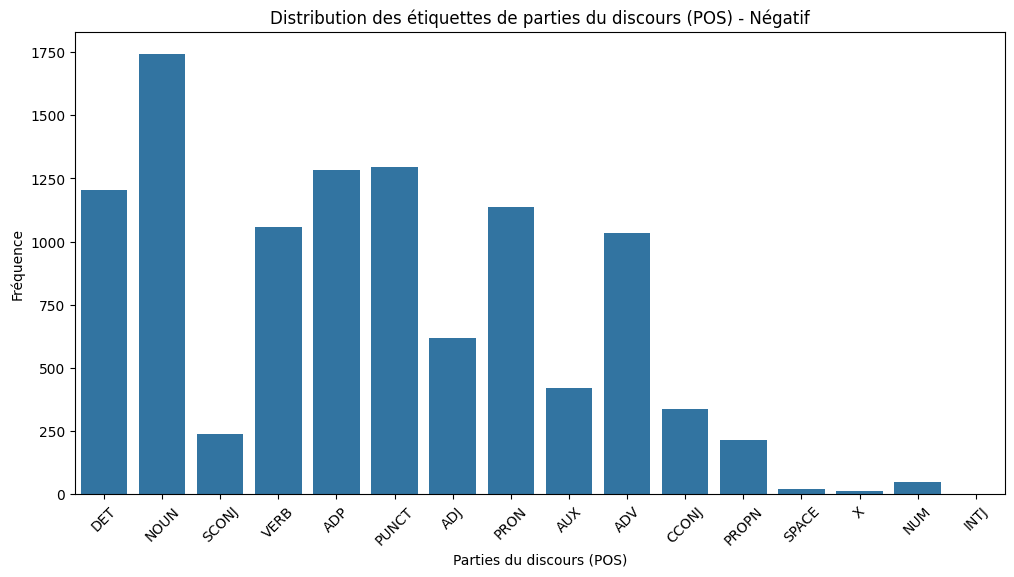

In [22]:
def plot_pos_distribution(data, label, title):
    """绘制指定情感标签的POS分布图"""
    # 筛选指定标签的数据
    label_data = data[data['label'] == label]

    # 统计POS标签分布
    pos_counts = Counter([pos for tokens in label_data['tokens_pos'] for _, pos in tokens])
    pos_df = pd.DataFrame(pos_counts.items(), columns=['POS', 'Count'])

    # 绘制图表
    plt.figure(figsize=(12, 6))
    sns.barplot(x='POS', y='Count', data=pos_df)
    plt.title(title)
    plt.xlabel('Parties du discours (POS)')
    plt.ylabel('Fréquence')
    plt.xticks(rotation=45)
    plt.show()

# 绘制正面评价的POS分布图
plot_pos_distribution(data, 1, 'Distribution des étiquettes de parties du discours (POS) - Positif')

# 绘制中性评价的POS分布图
plot_pos_distribution(data, 0, 'Distribution des étiquettes de parties du discours (POS) - Neutre')

# 绘制负面评价的POS分布图
plot_pos_distribution(data, -1, 'Distribution des étiquettes de parties du discours (POS) - Négatif')

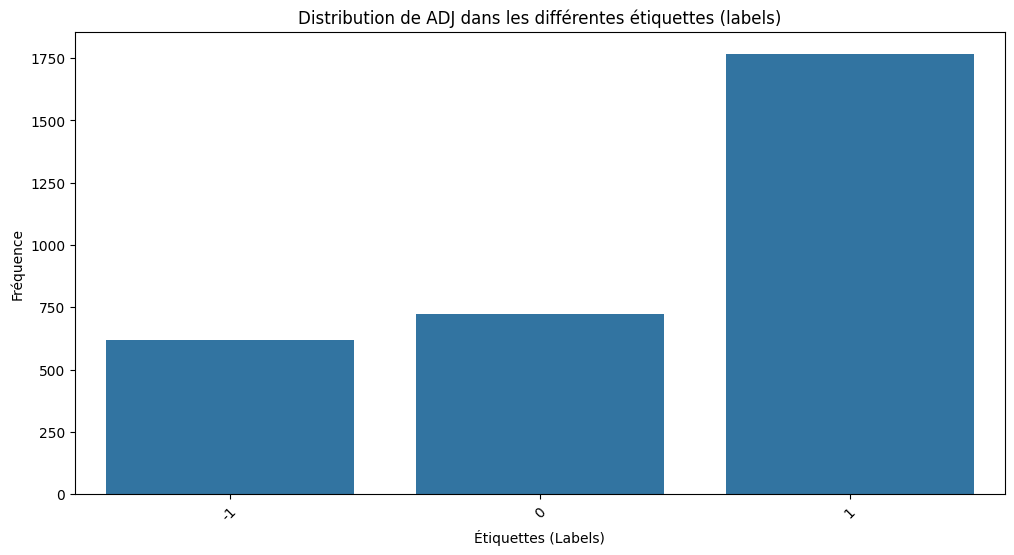

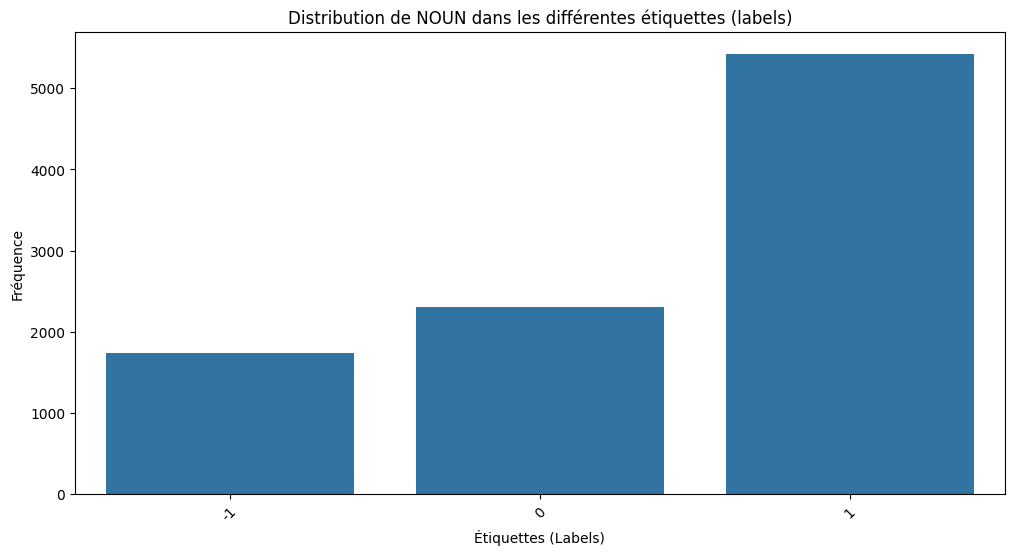

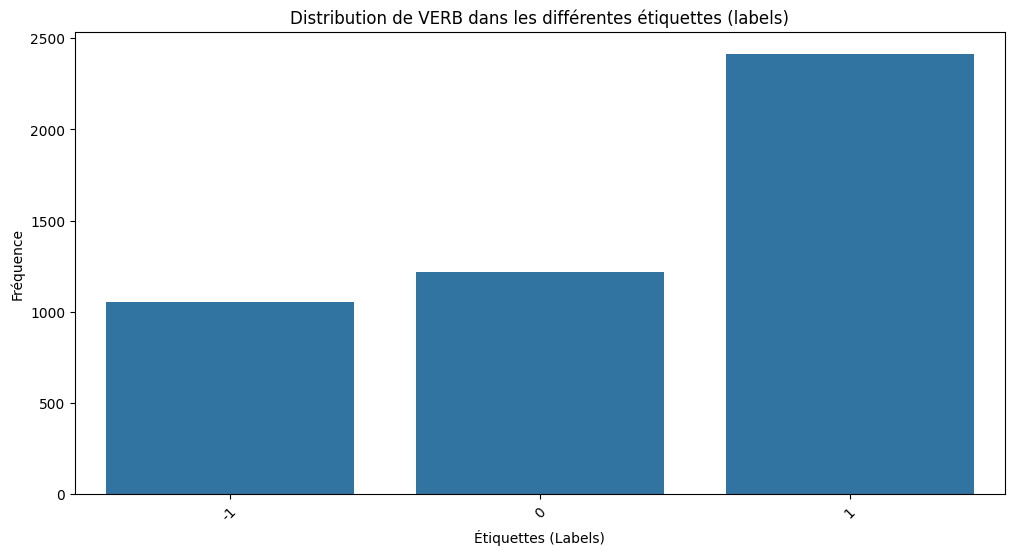

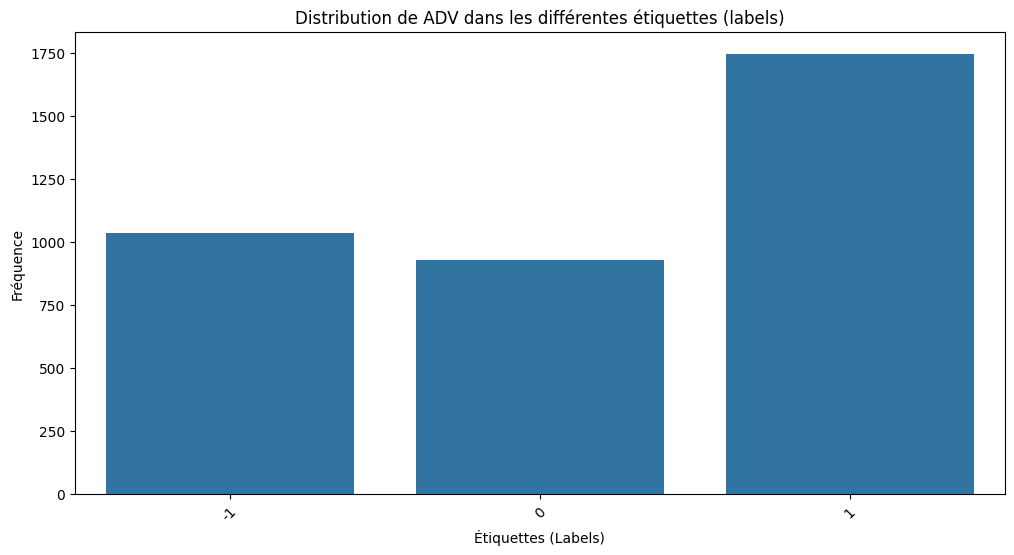

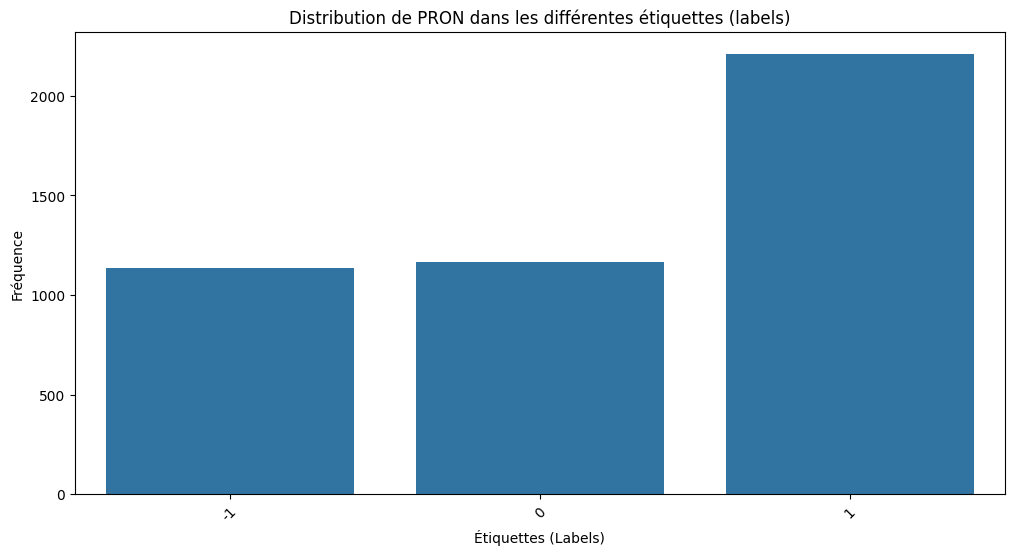

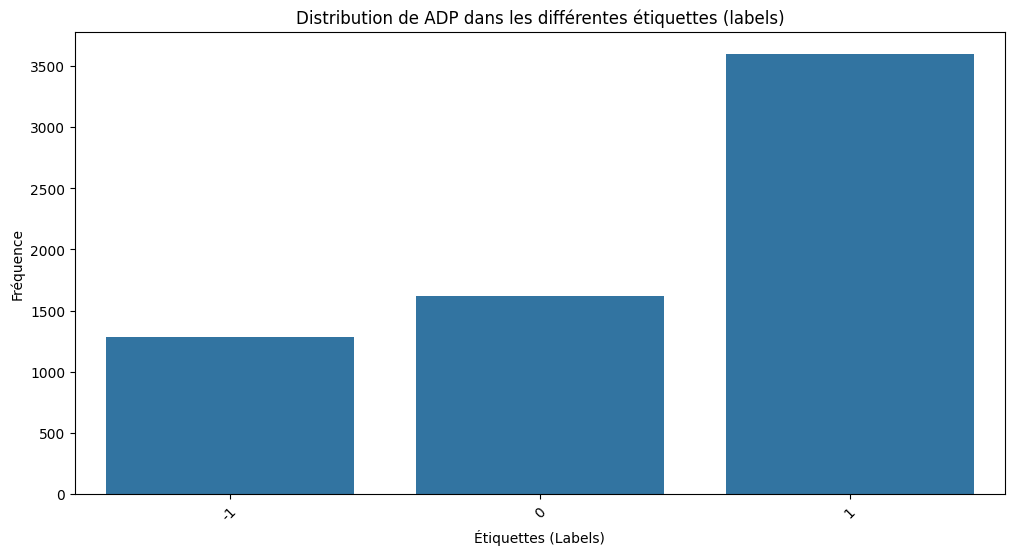

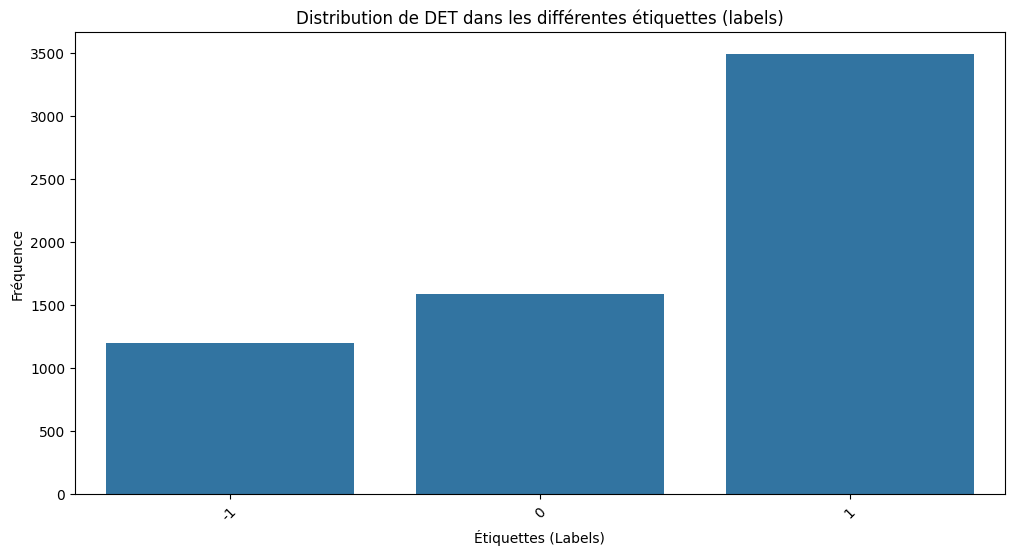

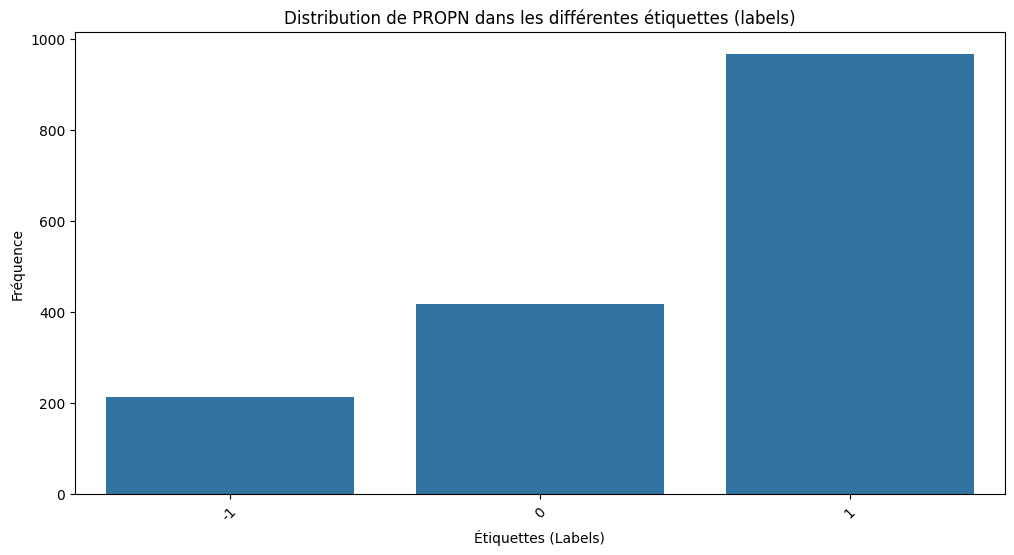

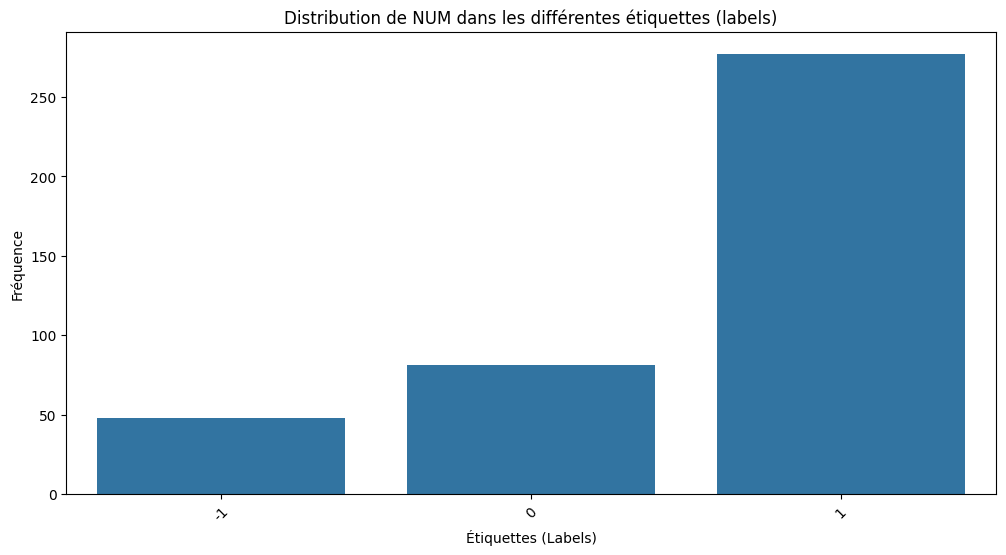

In [23]:
# 创建一个DataFrame来存储POS在不同标签中的分布
pos_label_df = pd.DataFrame(columns=['POS', 'Count', 'Label'])

for label in data['label'].unique():
    # 筛选指定标签的数据
    label_data = data[data['label'] == label]

    # 统计POS标签分布
    pos_counts = Counter([pos for tokens in label_data['tokens_pos'] for _, pos in tokens])
    pos_df = pd.DataFrame(pos_counts.items(), columns=['POS', 'Count'])
    pos_df['Label'] = label

    # 将结果添加到总的DataFrame中
    pos_label_df = pd.concat([pos_label_df, pos_df], ignore_index=True)

def plot_pos_distribution_by_label(pos_label_df, pos_tag):
    """绘制指定POS标签在不同情感标签中的分布图"""
    # 筛选指定POS标签的数据
    pos_data = pos_label_df[pos_label_df['POS'] == pos_tag]

    # 绘制图表
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Label', y='Count', data=pos_data)
    plt.title(f'Distribution de {pos_tag} dans les différentes étiquettes (labels)')
    plt.xlabel('Étiquettes (Labels)')
    plt.ylabel('Fréquence')
    plt.xticks(rotation=45)
    plt.show()

# 定义POS标签列表
pos_tags = ['ADJ', 'NOUN', 'VERB', 'ADV', 'PRON', 'ADP', 'DET', 'PROPN', 'NUM']

# 绘制每个POS标签在不同情感标签中的分布图
for pos_tag in pos_tags:
    plot_pos_distribution_by_label(pos_label_df, pos_tag)

In [24]:
# 检查每个标签的分布
label_counts = data['label'].value_counts()
print(label_counts)

label
-1    50
 1    50
 0    50
Name: count, dtype: int64


Top 10 adjectifs (positif) : [('grand', 31), ('autres', 31), ('jeune', 25), ('tous', 24), ('autre', 21), ('petit', 17), ('bon', 17), ('grande', 15), ('humaine', 15), ('première', 14)]
Top 10 adjectifs (neutre) : [('tout', 15), ('grand', 12), ('autres', 12), ('bon', 10), ('grande', 8), ('autre', 8), ('première', 8), ('française', 7), ('même', 7), ('tous', 7)]
Top 10 adjectifs (négatif) : [('autres', 12), ('autre', 10), ('première', 10), ('bon', 8), ('précis', 6), ('tout', 6), ('long', 6), ('tous', 6), ('belle', 6), ('française', 5)]
Top 10 adverbes (positif) : [('pas', 169), ('ne', 143), ('plus', 133), ("n'", 123), ('bien', 90), ('tout', 50), ('aussi', 49), ('même', 43), ('très', 38), ('peu', 33)]
Top 10 adverbes (neutre) : [('pas', 97), ('plus', 70), ('ne', 70), ("n'", 65), ('bien', 43), ('même', 30), ('peu', 26), ('très', 26), ('aussi', 22), ('tout', 17)]
Top 10 adverbes (négatif) : [('pas', 147), ("n'", 106), ('ne', 86), ('plus', 49), ('bien', 46), ('même', 32), ('peu', 23), ('très',

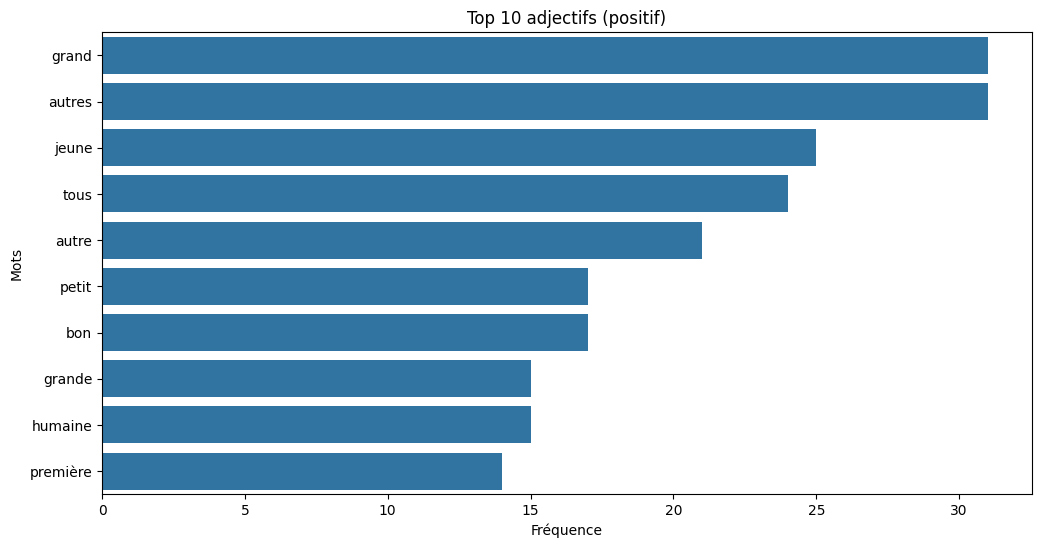

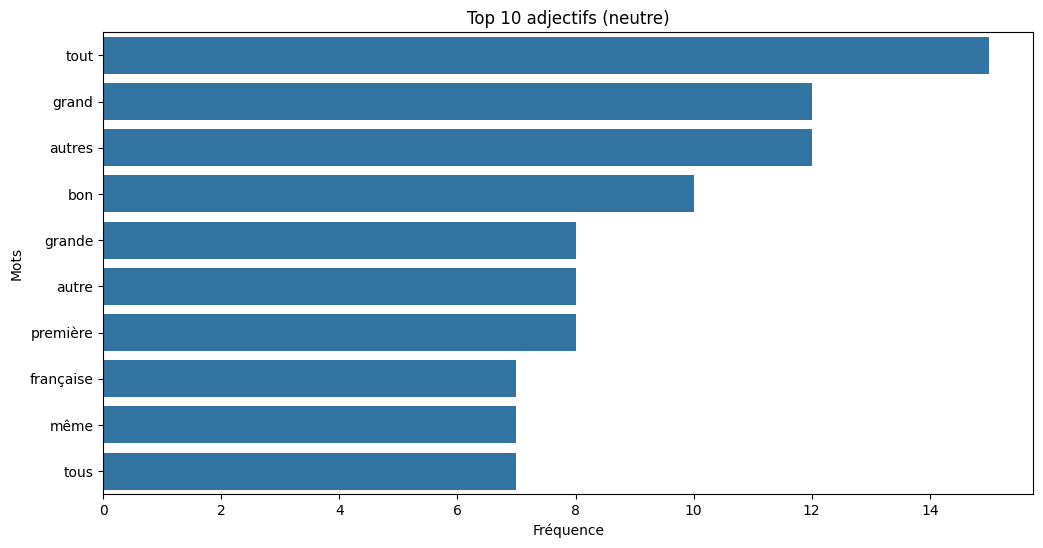

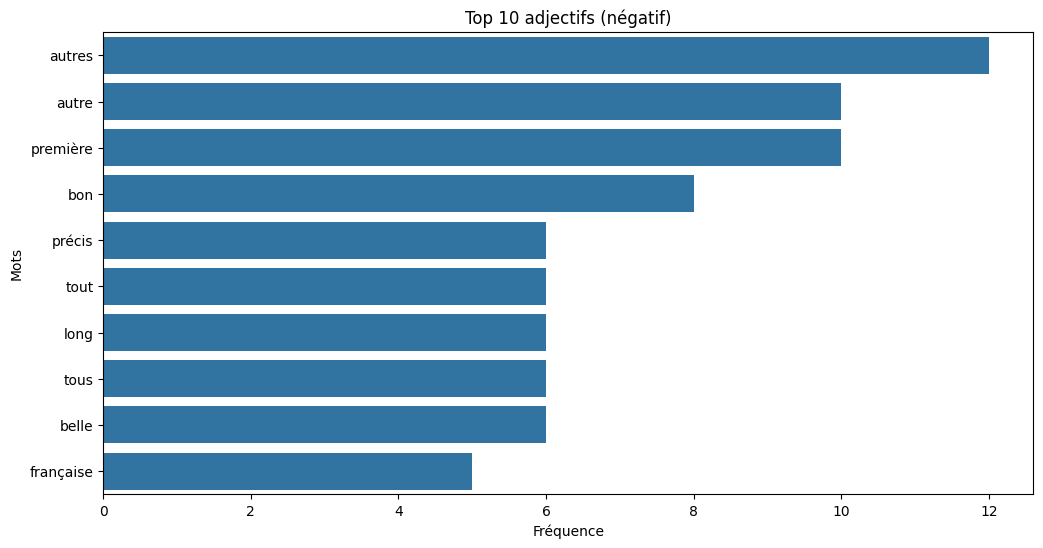

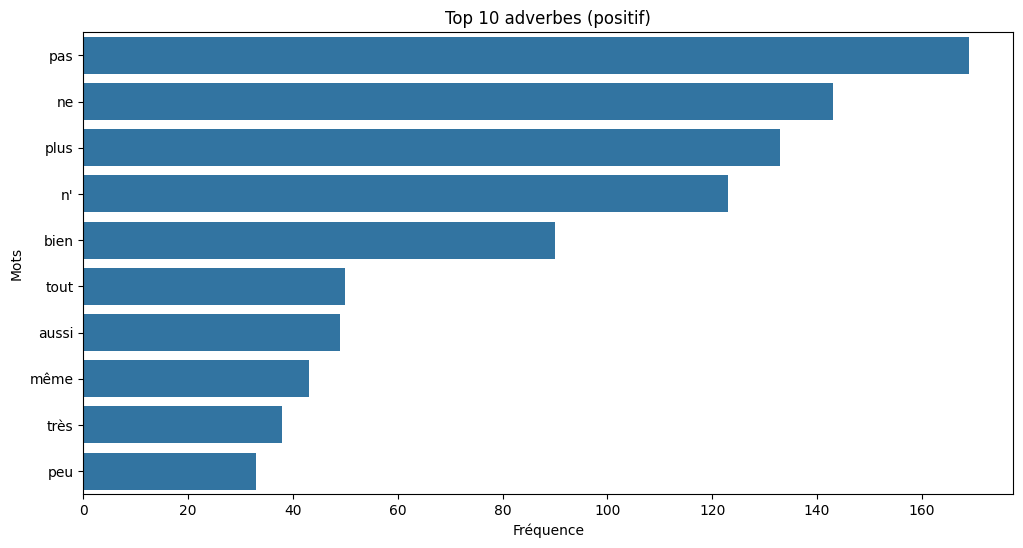

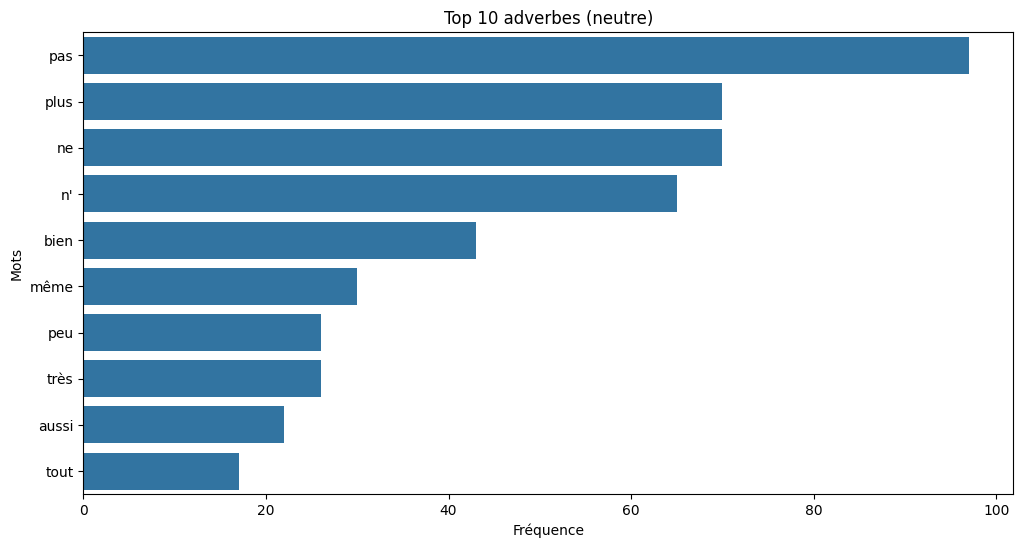

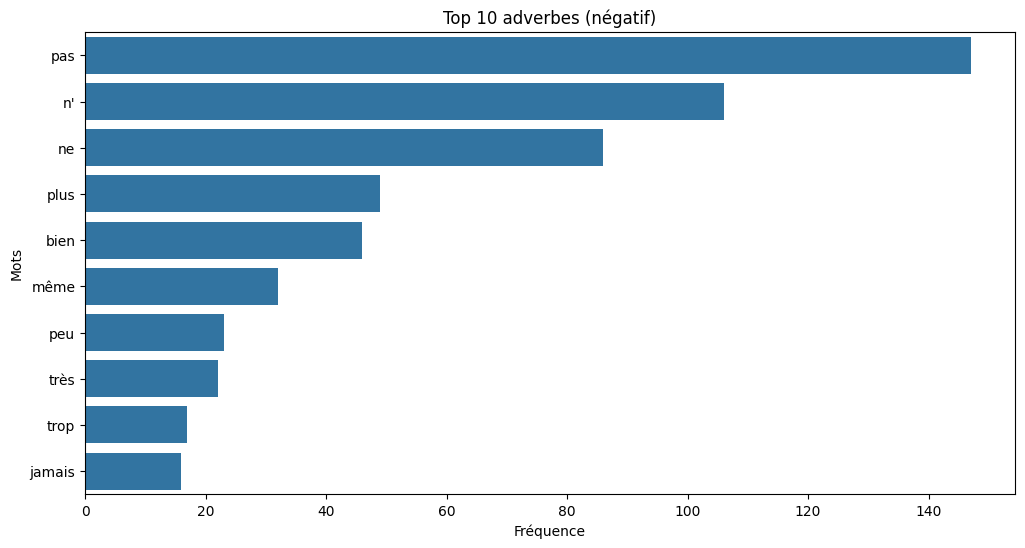

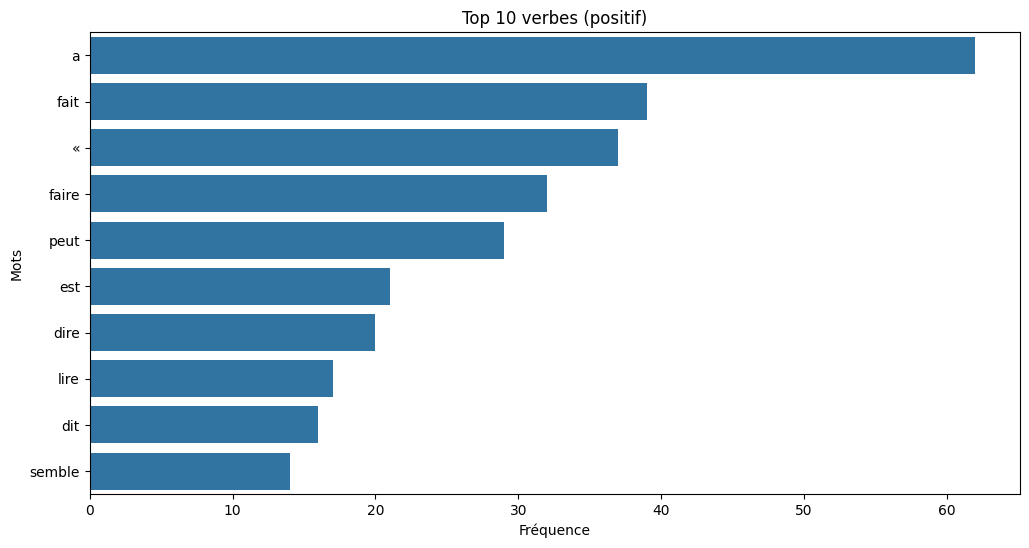

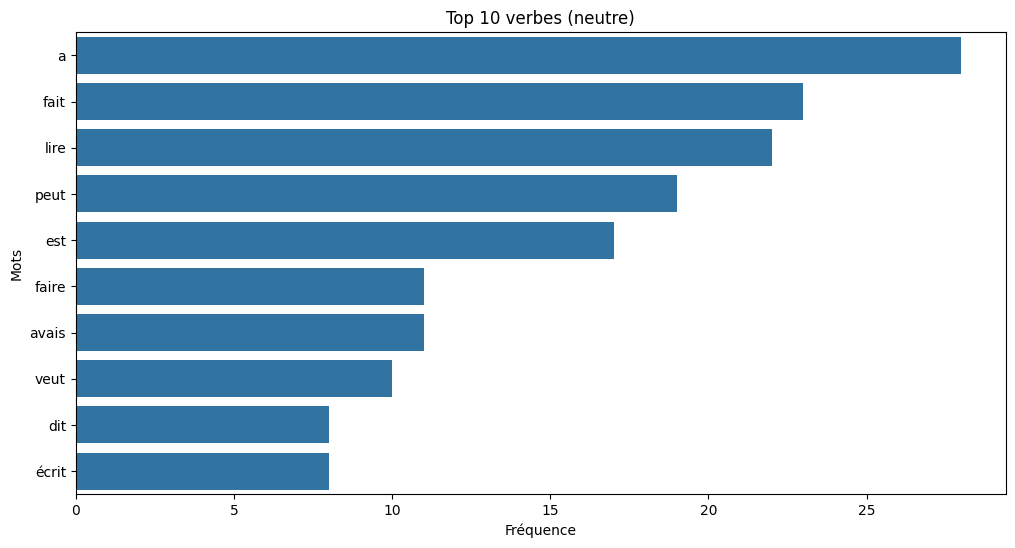

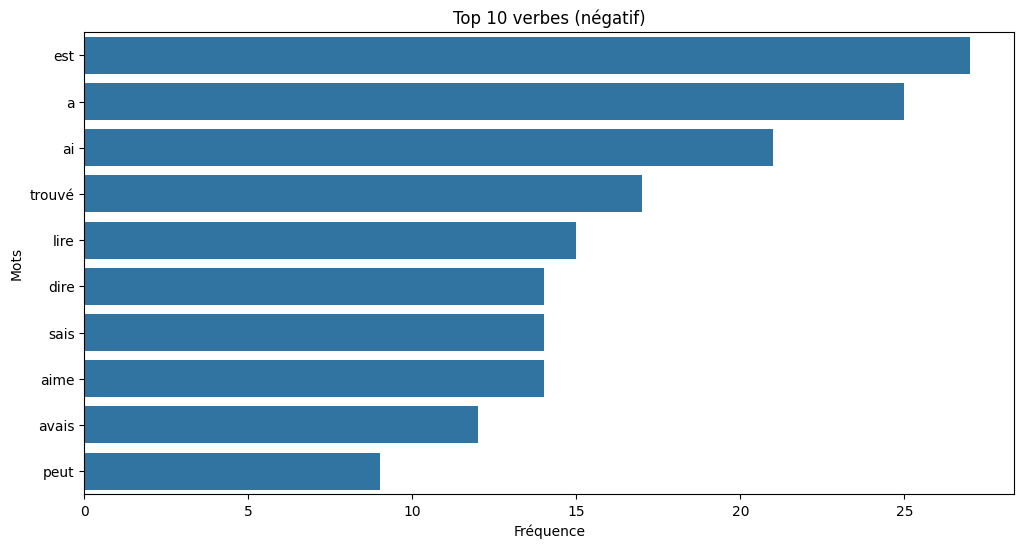

In [28]:
# Obtenir les mots les plus fréquents pour une étiquette de POS et de sentiment données
def obtenir_mots_frequents(data, pos_tag, label, top_n=10):
    label_data = data[data['label'] == label]
    mots = [token for tokens in label_data['tokens_pos'] for token, pos in tokens if pos == pos_tag]
    compte_mots = Counter(mots)
    return compte_mots.most_common(top_n)

# Obtenir les 10 adjectifs les plus fréquents pour chaque étiquette de sentiment
top_adjs_pos = obtenir_mots_frequents(data, 'ADJ', 1)
top_adjs_neu = obtenir_mots_frequents(data, 'ADJ', 0)
top_adjs_neg = obtenir_mots_frequents(data, 'ADJ', -1)

# Obtenir les 10 adverbes les plus fréquents pour chaque étiquette de sentiment
top_advs_pos = obtenir_mots_frequents(data, 'ADV', 1)
top_advs_neu = obtenir_mots_frequents(data, 'ADV', 0)
top_advs_neg = obtenir_mots_frequents(data, 'ADV', -1)

# Obtenir les 10 verbes les plus fréquents pour chaque étiquette de sentiment
top_verbs_pos = obtenir_mots_frequents(data, 'VERB', 1)
top_verbs_neu = obtenir_mots_frequents(data, 'VERB', 0)
top_verbs_neg = obtenir_mots_frequents(data, 'VERB', -1)

# Afficher les résultats
print("Top 10 adjectifs (positif) :", top_adjs_pos)
print("Top 10 adjectifs (neutre) :", top_adjs_neu)
print("Top 10 adjectifs (négatif) :", top_adjs_neg)

print("Top 10 adverbes (positif) :", top_advs_pos)
print("Top 10 adverbes (neutre) :", top_advs_neu)
print("Top 10 adverbes (négatif) :", top_advs_neg)

print("Top 10 verbes (positif) :", top_verbs_pos)
print("Top 10 verbes (neutre) :", top_verbs_neu)
print("Top 10 verbes (négatif) :", top_verbs_neg)

# Fonction pour tracer les graphiques de distribution des mots fréquents
def tracer_mots_frequents(mots, titre):
    mots_df = pd.DataFrame(mots, columns=['Mot', 'Compte'])
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Compte', y='Mot', data=mots_df)
    plt.title(titre)
    plt.xlabel('Fréquence')
    plt.ylabel('Mots')
    plt.show()

# Tracer la distribution des adjectifs
tracer_mots_frequents(top_adjs_pos, 'Top 10 adjectifs (positif)')
tracer_mots_frequents(top_adjs_neu, 'Top 10 adjectifs (neutre)')
tracer_mots_frequents(top_adjs_neg, 'Top 10 adjectifs (négatif)')

# Tracer la distribution des adverbes
tracer_mots_frequents(top_advs_pos, 'Top 10 adverbes (positif)')
tracer_mots_frequents(top_advs_neu, 'Top 10 adverbes (neutre)')
tracer_mots_frequents(top_advs_neg, 'Top 10 adverbes (négatif)')

# Tracer la distribution des verbes
tracer_mots_frequents(top_verbs_pos, 'Top 10 verbes (positif)')
tracer_mots_frequents(top_verbs_neu, 'Top 10 verbes (neutre)')
tracer_mots_frequents(top_verbs_neg, 'Top 10 verbes (négatif)')